# Keras | CNN Dog or Cat Classification
-----------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------
<img src = "https://metro.co.uk/wp-content/uploads/2015/11/mg_dogorcat_comp.png" width="800" height="400">

# The Dataset link:
-- Cats and Dogs dataset to train a DL model<br>
. To show the data set <a href="https://www.kaggle.com/datasets/tongpython/cat-and-dog">see data set</a>

# import the libraries.

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

import cv2

# Global Variable

In [3]:
category = ["cats", "dogs"]

EPOCHS = 60
IMGSIZE = 224
CHANNELS = 3
BATCH_SIZE = 128
STOPPING_PATIENCE = 8
VERBOSE = 1
OPTIMIZER = 'adam'
TRAINING_DIR="data/training_set"
TEST_DIR="data/test_set"

# Read & Preprocessing Data

In [4]:
generator = ImageDataGenerator(rescale=1./255, 
                               shear_range=0.15, 
                               zoom_range=0.2, 
                               horizontal_flip=True
                              ) 

train_data = generator.flow_from_directory( directory=TRAINING_DIR, 
                                            target_size=(IMGSIZE, IMGSIZE),
                                            color_mode='rgb',
                                            classes=category, 
                                            batch_size=BATCH_SIZE, 
                                            )


test_data = generator.flow_from_directory( directory=TEST_DIR, 
                                           target_size=(IMGSIZE, IMGSIZE), 
                                           color_mode='rgb',
                                           classes=category, 
                                           batch_size=BATCH_SIZE,
                                           shuffle=False
                                           )

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


# CNN Network.

In [5]:
model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', padding = 'same', input_shape=(IMGSIZE, IMGSIZE, CHANNELS)))
model.add(Conv2D(16, (3, 3), activation='relu',padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), activation='relu',padding = 'same'))
model.add(Conv2D(32, (3, 3), activation='relu',padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='relu',padding = 'same'))
model.add(Conv2D(128, (3, 3), activation='relu',padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(256, (3, 3), activation='relu',padding = 'same'))
model.add(Conv2D(256, (3, 3), activation='relu',padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(2, activation='softmax'))

# Summary of model 

In [6]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 112, 112, 16)     64        
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 32)      9

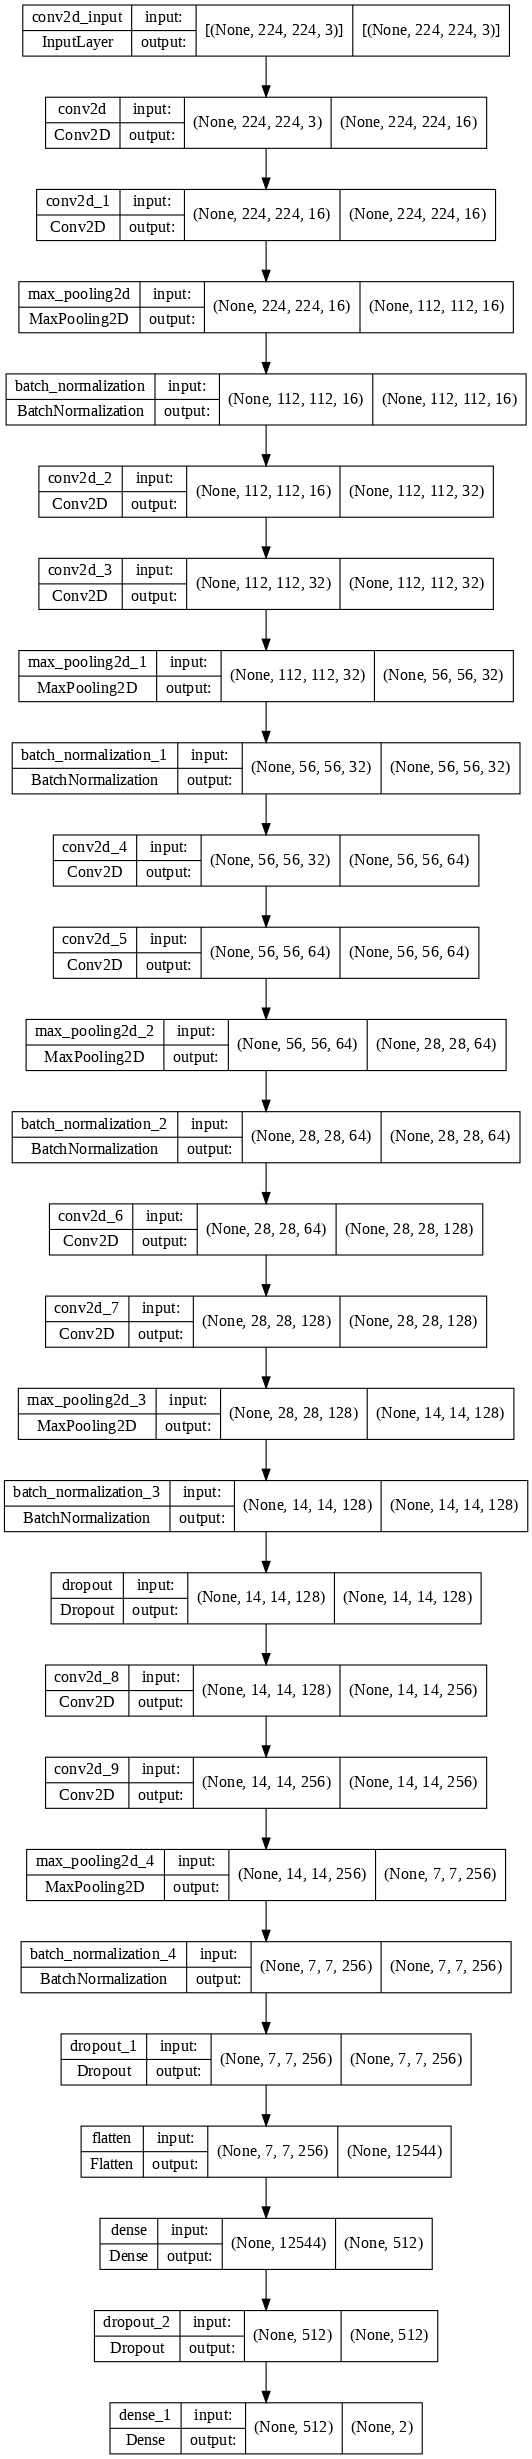

In [7]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes = True,expand_nested = True,dpi = 80)

# callbacks Functaion

In [ ]:
es = EarlyStopping(patience=STOPPING_PATIENCE, 
                   monitor='val_accuracy', 
                   mode='max', 
                   verbose=1, 
                   restore_best_weights=True)

In [ ]:
checkpoint = ModelCheckpoint(
    'saved-model/best-model', monitor='val_loss', mode='min', 
    save_weights_only=True, save_best_only=True, verbose=1
)


# Training epochs

In [ ]:
history = model.fit(train_data, 
                    epochs=EPOCHS, 
                    validation_data=test_data,
                    shuffle=True,
                    callbacks=[es,checkpoint])

Epoch 1/50
63/63 [==============================] - ETA: 0s - loss: 0.8189 - accuracy: 0.6222
Epoch 1: val_loss improved from inf to 1.56653, saving model to saved-model/best-model
63/63 [==============================] - 160s 2s/step - loss: 0.8189 - accuracy: 0.6222 - val_loss: 1.5665 - val_accuracy: 0.4998
Epoch 2/50
63/63 [==============================] - ETA: 0s - loss: 0.5660 - accuracy: 0.7084
Epoch 2: val_loss improved from 1.56653 to 1.03965, saving model to saved-model/best-model
63/63 [==============================] - 141s 2s/step - loss: 0.5660 - accuracy: 0.7084 - val_loss: 1.0397 - val_accuracy: 0.4998
Epoch 3/50
63/63 [==============================] - ETA: 0s - loss: 0.5261 - accuracy: 0.7389
Epoch 3: val_loss did not improve from 1.03965
63/63 [==============================] - 140s 2s/step - loss: 0.5261 - accuracy: 0.7389 - val_loss: 1.2979 - val_accuracy: 0.4998
Epoch 4/50
63/63 [==============================] - ETA: 0s - loss: 0.4714 - accuracy: 0.7798
Epoch 4: 

# Results visualization

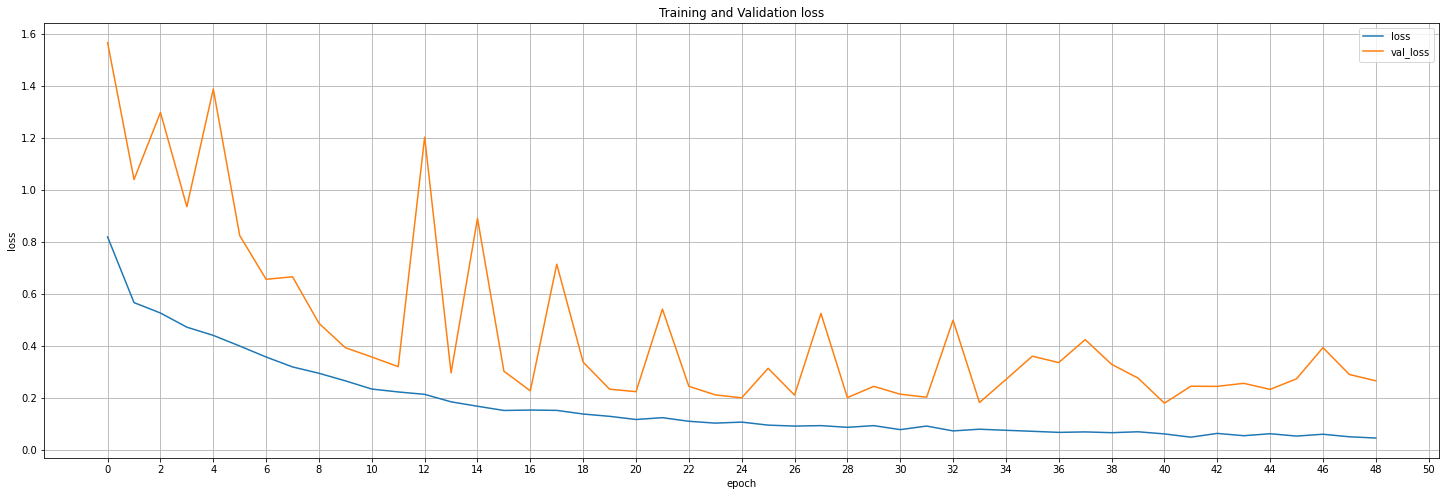

In [ ]:
hist_df = pd.DataFrame(history.history)
hist_df.plot(y=['loss', 'val_loss'], figsize=(30, 10))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.grid(axis='both')
plt.xticks(np.arange(0, 51, 2))
plt.show()

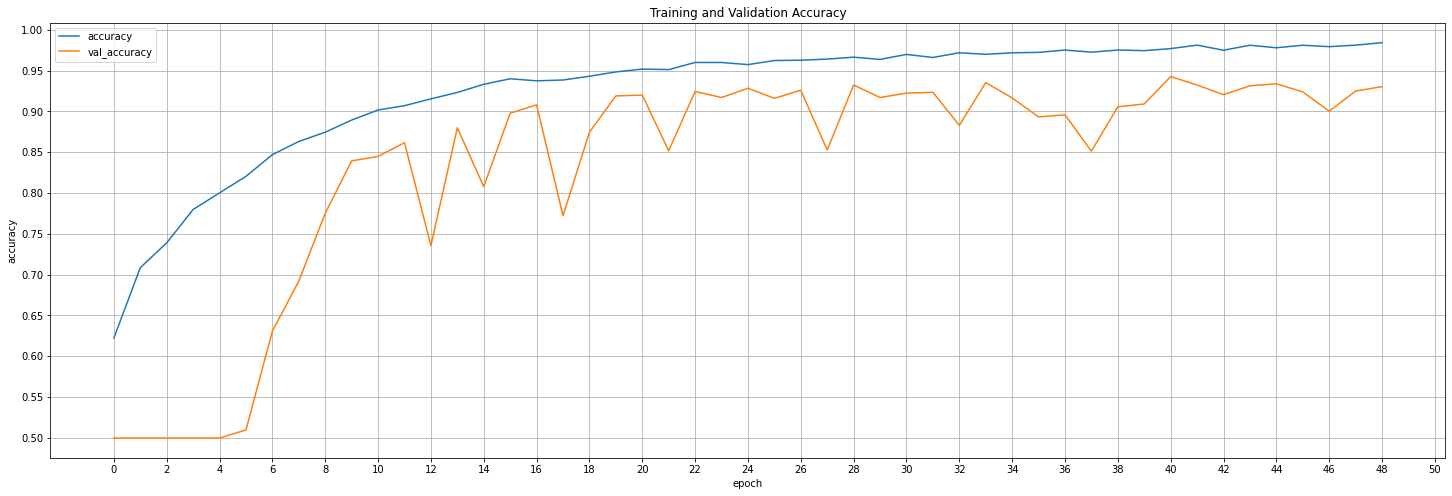

In [ ]:
hist_df = pd.DataFrame(history.history)
hist_df.plot(y=['accuracy', 'val_accuracy'], figsize=(30, 10))
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Training and Validation Accuracy')
plt.grid(axis='both')
plt.xticks(np.arange(0,51, 2))
plt.yticks(np.arange(0.5, 1.01, 0.05))
plt.show()

# Evaluation

In [8]:
model.load_weights('saved-model/best-model')
train_acc=model.evaluate(train_data)
test_acc = model.evaluate(test_data)

16/16 [==============================] - 430s 28s/step - loss: 0.2000 - accuracy: 0.9402


# Testing Visualization

In [33]:
test_paths = np.array(glob(TEST_DIR + '/*/*.jpg'))

ids = np.random.choice(np.arange(len(test_paths)), size=32)


samples = test_paths[ids]

In [34]:
im_test = []
c = 0
for img in samples:
    c = c + 1
    img_path = img
    img_arr = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img_arr = cv2.cvtColor(img_arr,cv2.COLOR_BGR2RGB)
    img_arr = cv2.resize(img_arr, (IMGSIZE, IMGSIZE))
    img_arr = img_arr / 255.0
    im_test.append(img_arr)

    
im_test = np.array(im_test).reshape(-1, IMGSIZE, IMGSIZE,3)
im_pred = model.predict(im_test)

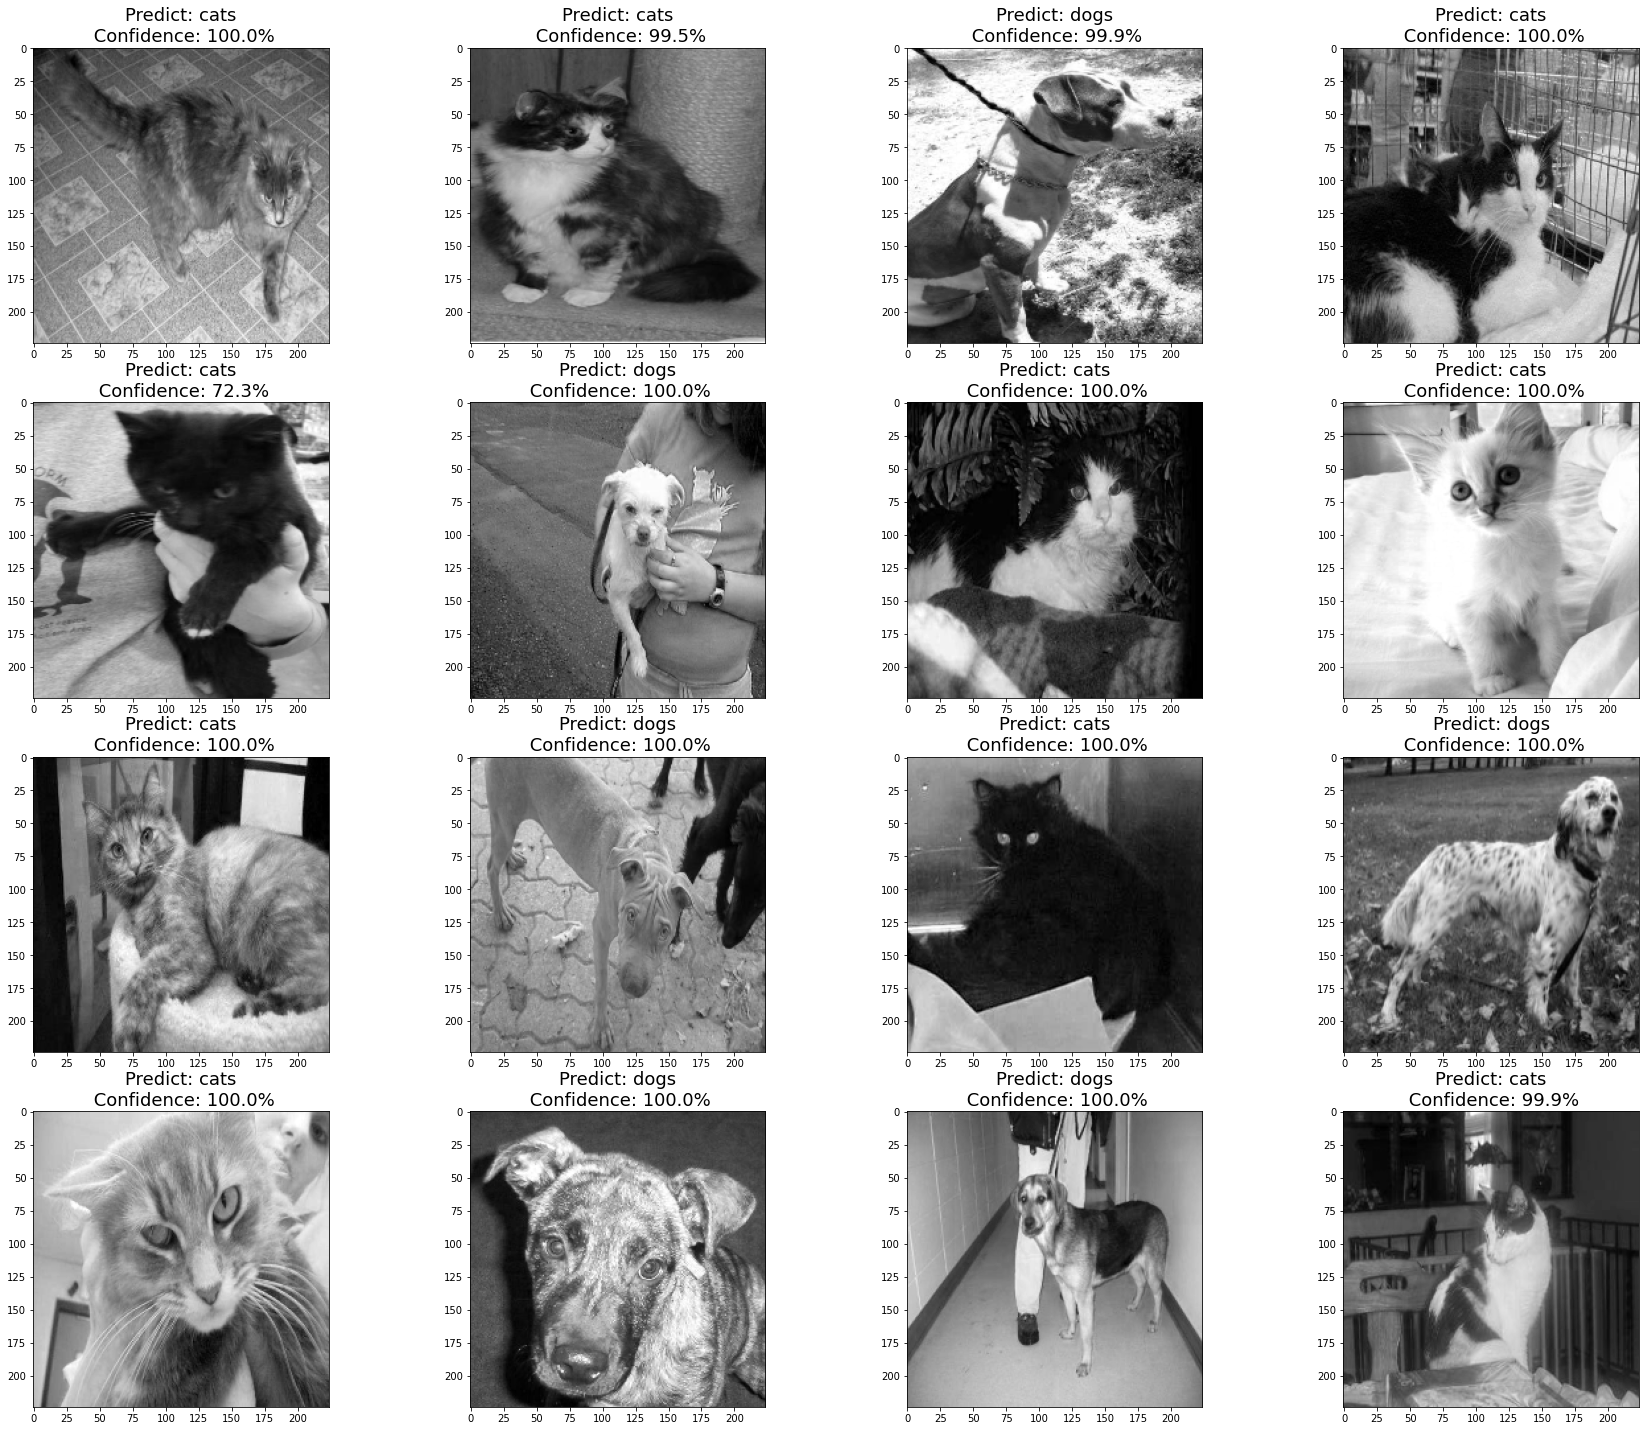

In [35]:
fig , ax = plt.subplots(4, 4, figsize=(30, 25))


for i, axis in enumerate(ax.flat):
    axis.imshow(im_test[i][:, :, 0],cmap='gray')
    pred_class = im_pred[i].argmax()
    pred_prob = im_pred[i].max() * 100
    

    axis.set_title(f'Predict: {category[pred_class]}\n Confidence: {pred_prob:.1f}%', fontsize=18)

# Save model

In [14]:
# save the model weights
model.save_weights("my_model")